In [ ]:
!pip install opendatasets

In [3]:
# {"username":"keeplooking","key":"5a66906a29ae25fdb865a1eda7e7c25d"}
import opendatasets as od
# od.download("https://www.kaggle.com/datasets/rhtsingh/130k-images-512x512-universal-image-embeddings")
od.download("https://www.kaggle.com/datasets/paulchambaz/google-street-view")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  keeplooking


Your Kaggle Key:

  ········


100%|██████████| 12.9G/12.9G [03:50<00:00, 60.4MB/s]


In [ ]:
!python train_reg.py -w 42

In [50]:
from model import mobilenetv3, regnet
import torch
import torch.nn as nn

def predict(md, inputs):
    outputs = md(inputs)
    return torch.argmax(outputs, dim=1) / md.n_class * 360

mode = "small"
# mode = "large"
net = mobilenetv3(n_class=180, mode = mode)
net.load_state_dict(torch.load(f"mobilenetv3_{mode}_best.pth", map_location=torch.device('cpu')))
net.eval()

model = regnet(n_class=180, train=True)
model.eval()

inputs = torch.randn(1, 3, 224, 224)
model.predict(inputs)

tensor([304.])

In [57]:
inputs = torch.randn(1, 3, 224, 224)
model.predict(inputs)

tensor([304.])

In [53]:
import os
from PIL import Image
path = "testdata"
img_list = os.listdir(path)
imgs = []
for i in img_list:
    imgs.append(Image.open(os.path.join(path, i)))

In [46]:
import torchvision.transforms as T
from dataset import create_circular_mask
def test(md):
    with torch.no_grad():
        for img in imgs:
            mask = create_circular_mask(224, 224, radius=112)
            t1 = T.Compose([
                            T.ToTensor(),
                            T.Resize((224,224))
                        ])
            tnorm = T.Normalize(
                                mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225]
                            )
            
            inputs = t1(img)
            inputs = torch.where(mask, inputs, torch.ones_like(inputs))
            rem = T.ToPILImage()(inputs)
            inputs = tnorm(inputs)

            # make inputs 4D
            inputs = inputs.unsqueeze(0)
            rot = md.predict(inputs).item()
            new_img = T.functional.rotate(rem, - rot)

            # print(rot) # angle
            # display(rem) # original image
            display(new_img) # img after rotation

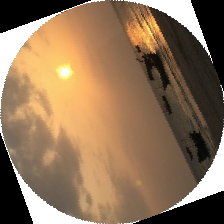

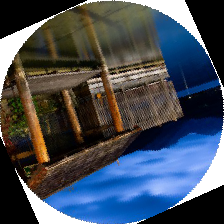

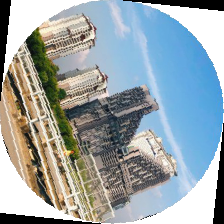

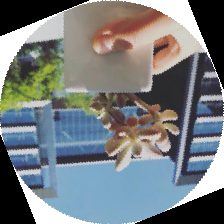

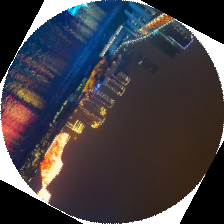

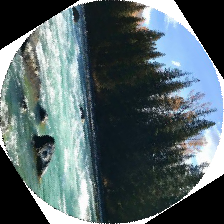

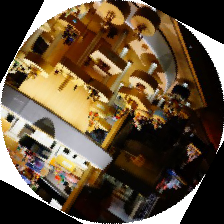

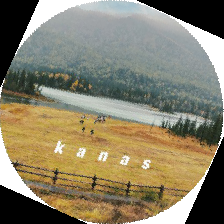

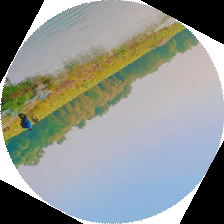

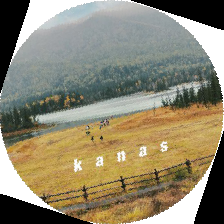

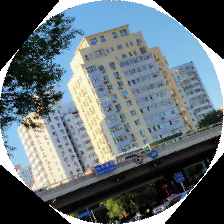

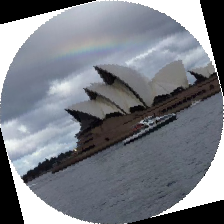

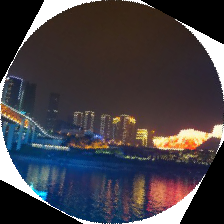

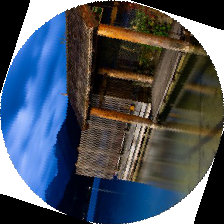

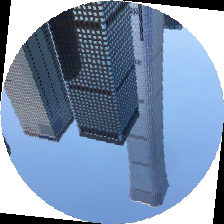

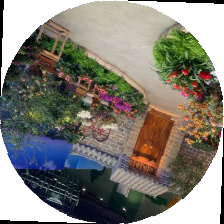

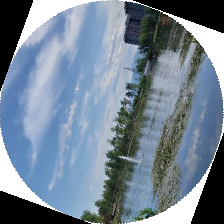

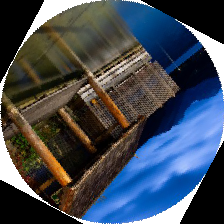

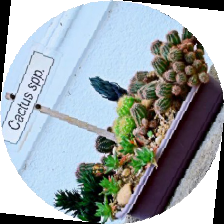

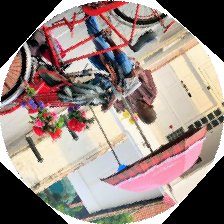

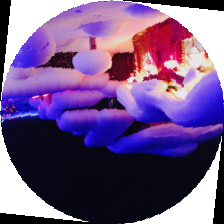

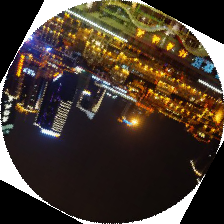

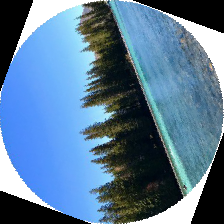

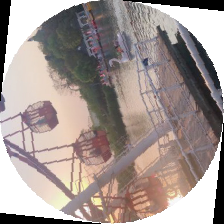

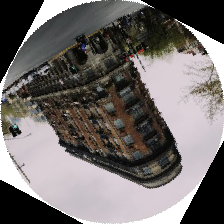

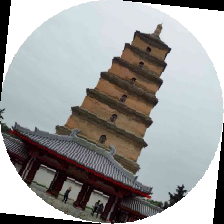

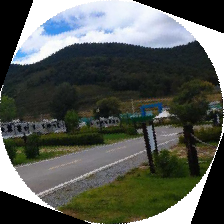

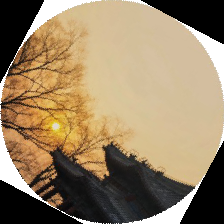

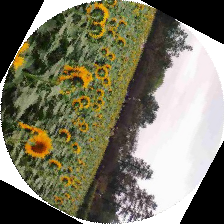

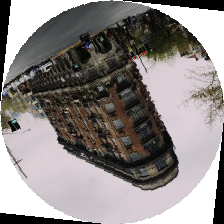

In [59]:
# test(model)